In [54]:
import torch
import hdc
import hdc.functional as HDF
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use(['science', 'nature'])

In [55]:
def bundle(*inputs, normalize=False):
    res = torch.vstack(inputs).sum(-2)

    if normalize:
        res = torch.where(res > 0, 1.0, -1.0)

    return res

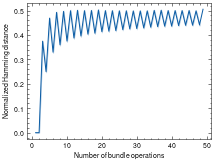

In [67]:
dim = 10000
max_bundles = 50
bundle_step = 1
repeats = 10

data = pd.DataFrame(columns=['distance', 'operations'])

k = 0
for r in range(repeats):
    x = HDF.random_hv(max_bundles, dim)

    for k, num_bundles in enumerate(range(1, max_bundles, bundle_step), start=k):
        a = torch.zeros(dim)
        for i in range(num_bundles):
            a = bundle(a, x[i], normalize=True)

        b = torch.zeros(dim)
        for i in range(num_bundles):
            b = bundle(b, x[i], normalize=i==num_bundles-1)

        data.loc[k] = [((a != b).sum() / dim).item(), num_bundles]

ax = sns.lineplot(x="operations", y="distance", data=data)
ax.set_xlabel("Number of bundle operations")
ax.set_ylabel("Normalized Hamming distance")
plt.savefig("bundle-error.pgf")
plt.savefig("bundle-error.png", dpi=300)
plt.show()